<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week07/classification_metrics_exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
# Imports
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import recall_score, precision_score, roc_auc_score, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQqn3R70YN2hBzO2r781ZSGfZCxw17vMYb_Yb_llUKew2cQM8L7pnf4_pVQ_pSxy-58458LUv4L4jSb/pub?output=csv'
df = pd.read_csv(url)
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [5]:
# Explore the data
print('Duplicates:', df.duplicated().sum())
print('Missing Values:', df.isna().sum().sum())
print('Dimensions:', df.shape)
print()
df.info()

Duplicates: 0
Missing Values: 0
Dimensions: (4521, 26)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed  

In [6]:
# Set the features and target
X = df.drop(columns = 'y_yes')
y = df['y_yes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [7]:
# Build a dummy classifier
dc = DummyClassifier()
dc.fit(X_train, y_train)

DummyClassifier()

In [8]:
# Build a logistic regression pipeline
logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression())
# Get the hyperparameters of the pipeline
logreg_pipe.get_params()

{'logisticregression': LogisticRegression(),
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False,
 'memory': None,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression', LogisticRegression())],
 'verbose': False}

In [21]:
# Make a param_grid dictionary
param_grid = {'logisticregression__C': np.float_power(10, range(-8, 8)),
              'logisticregression__max_iter': [1000],
              'logisticregression__penalty': ['l1', 'l2'],
              'logisticregression__solver': ['liblinear']}

In [22]:
# Tune the logistic regression model
lr_grid_search = GridSearchCV(logreg_pipe, param_grid)
lr_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07]),
                         'logisticregression__max_iter': [1000],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear']})

In [25]:
# Get the best parameters
lr_grid_search.best_params_
# Get the best model
best_logreg = lr_grid_search.best_estimator_

In [52]:
# Evaluate the logistic regression model
test_pred = best_logreg.predict(X_test)
train_pred = best_logreg.predict(X_train)
print('Logistic Regression Metrics\n')
print('Train Accuracy:', best_logreg.score(X_train, y_train))
print('Test Accuracy:', best_logreg.score(X_test, y_test))
print('Train Recall:', recall_score(y_train, train_pred))
print('Test Recall:', recall_score(y_test, test_pred))
print('Train Precision:', precision_score(y_train, train_pred))
print('Test Precision:', precision_score(y_test, test_pred))
print('Train ROC AUC Score:', roc_auc_score(y_train, best_logreg.predict_proba(X_train)[:, 1]))
print('Test ROC AUC Score:', roc_auc_score(y_test, best_logreg.predict_proba(X_test)[:, 1]))

Logistic Regression Metrics

Train Accuracy: 0.8914454277286136
Test Accuracy: 0.8956675508399646
Train Recall: 0.19444444444444445
Test Recall: 0.224
Train Precision: 0.6111111111111112
Test Precision: 0.5714285714285714
Train ROC AUC Score: 0.8604009365532411
Test ROC AUC Score: 0.8664970178926441


In [57]:
# Evaluate the dummy model
dc_test_pred = dc.predict(X_test)
dc_train_pred = dc.predict(X_train)
print('Dummy Classifier Metrics\n')
print('Train Accuracy:', dc.score(X_train, y_train))
print('Test Accuracy:', dc.score(X_test, y_test))
print('Train Recall:', recall_score(y_train, dc_train_pred))
print('Test Recall:', recall_score(y_test, dc_test_pred))
print('Train Precision:', precision_score(y_train, dc_train_pred, zero_division = 0))
print('Test Precision:', precision_score(y_test, dc_test_pred, zero_division = 0))
print('Train ROC AUC Score:', roc_auc_score(y_train, dc.predict_proba(X_train)[:, 1]))
print('Test ROC AUC Score:', roc_auc_score(y_test, dc.predict_proba(X_test)[:, 1]))

Dummy Classifier Metrics

Train Accuracy: 0.8831858407079646
Test Accuracy: 0.8894783377541998
Train Recall: 0.0
Test Recall: 0.0
Train Precision: 0.0
Test Precision: 0.0
Train ROC AUC Score: 0.5
Test ROC AUC Score: 0.5


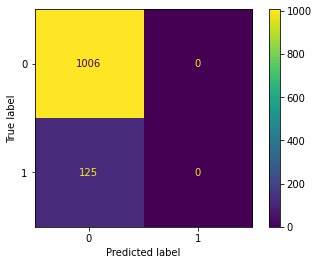

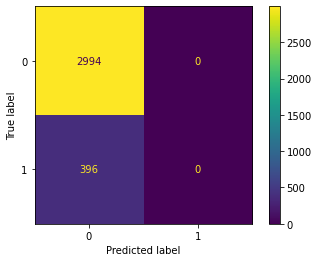

In [72]:
# Construct confusion matrices for the dummy classifier
ConfusionMatrixDisplay.from_estimator(dc, X_test, y_test);
ConfusionMatrixDisplay.from_estimator(dc, X_train, y_train);

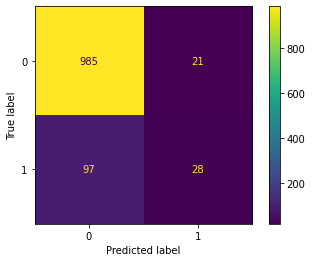

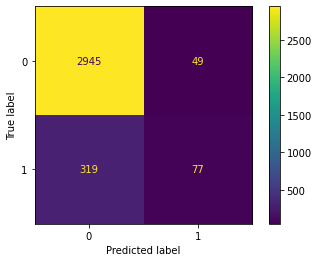

In [75]:
# Construct confusion matrices for the logistic regression model
ConfusionMatrixDisplay.from_estimator(best_logreg, X_test, y_test);
ConfusionMatrixDisplay.from_estimator(best_logreg, X_train, y_train);

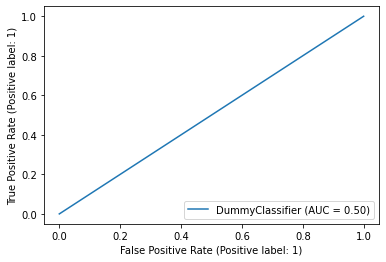

In [78]:
# Construct ROC AUC plots for the dummy classifier
RocCurveDisplay.from_estimator(dc, X_train, y_train);

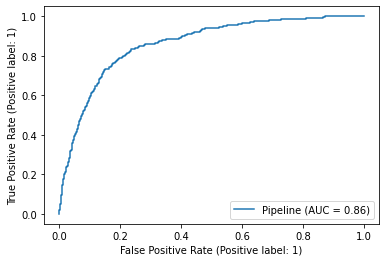

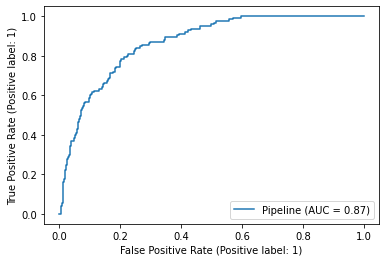

In [79]:
# Construct ROC AUC plots for the logistic regression model
RocCurveDisplay.from_estimator(best_logreg, X_train, y_train);
RocCurveDisplay.from_estimator(best_logreg, X_test, y_test);